# Predicting Diameter and Physical Harm of Asteroids using Machine Learning
**Authors** :
Colin Campbell (c_c953),  Leah Lewis (lrl68), Ryan Wakabayashi (rjw102) and Jake Worden (jrw294)

**Abstract** :  [  ]

## Introduction

The ability to take in data on nearby asteroids and identify whether or not they are a threat to life on earth is important for civilization going forward. One of the most important attributes to identify if an asteroid is a threat is the diameter of the asteroid. Companies like Nasa and SpaceX are currently working on technologies to identify these threats and whether or not they will path towards earth. Because this is something that is currently being researched in the field, it is important to try and identify what other attributes will help identify how hazardous these asteroids will be. The goal of this project is to use machine learning techniques in order to correctly predict if an asteroid is considered physically hazardous or not based on features of the asteroid itself.
 

 

## Problem Statement 


Given a dataset of asteroid features, can machine learning be used to predict an unknown asteriod's diameter and whether it's physically hazardous along with achieving the following sucess measures?


| ML Approach |  CV Score | F1 | Precision | Recall | R^2 |
| ---------- | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| Regressing Diameter | >85% | - | - | - |  >85% |
| Classifying Physically Hazardous Asteroid | ≥80% | ≥80% | ≥80% | ≥80% | - | 

## Related Work

Each of the following kaggle projects attempted to apply machine learning to predict diameter of asteroids and served as a solid benchmark for this project: 

| Kaggle Project Title | Project Author | Project Description | Project Results | Link to Project |
| ---------- | :-----------: | :-----------: | :-----------: | :-----------: |
| Asteroid Diameter Estimators | needs | needs | needs |[See Kaggle](https://www.kaggle.com/liamkesatoran/asteroid-diameter-estimators-with-added-difficulty) |
| Asteroid Diameter Prediction | needs | needs | needs |[See Kaggle](https://www.kaggle.com/titanpointe/asteroid)|

## Data Management 


### Data Gathering

Links to the database and dataset used can be found below:

*Small-Body DataBase Link:* [Jet Propulsion Laboratory Solar System Dynamics](https://ssd.jpl.nasa.gov/sbdb_query.cgi)

*Open Asteroid Dataset Link:* [Asteroid_Updated.csv](https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv)

#### Open Asteroid Dataset Description:

1. The dataset was created on behalf of NASA by the Jet Propulsion Laboratory (JPL) at California Institute of Technology's "Solar System Dynamics"(SSD) group. One of the primary responsibilites of the SSD group is to maintain the Small-Body DataBase (SBDB) which is comprised of information relating to the orbits, physical parameters, discovery cirumstances and hazard assements for all known small-bodies in our solar system. In this context, small-bodies are defined as comets and asteroids, where “asteroids” includes Kuiper-belt objects (TNOs) and dwarf planets. This database is actively kept up-to-date, meaning as new data is made available for both new and existing small-bodies, new orbits are automatically computed typically within an hour or two.


2. The dataset used here was gathered from the SSD's SBDB via the Open Asteroid Dataset challange posted on [Kaggle](https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv).


3. The dataset itself is composed of various instances of small-bodies, along with their respective oribital elements. A summary of each of these elements or features along with a brief desciption can be seen in the following table:

| Feature | Description |
| ------- | ----------- |
| a | Semi-major axis(au) | 
| e | Eccentricity | 
| i | Inclination with respect to x-y ecliptic plain(deg) |
| om | Longitude of the ascending node |
| w | Argument of perihelion |
| q | Perihelion distance(au) |
| ad | Aphelion distance(au) |
| per_y | Oribital period(YEARS) |
| data_arc | Data arc-span(d) | float64 |
| condition_code | Orbit condition code |
| n_obs_used | Number of Observation used |
| H | Absolute magnitude parameter |
| neo | Near Earth Object | object |
| pha | Physically Hazardous Asteroid |
| diameter | Diameter of asteroid(Km) |
| extent | Object bi/tri axial ellipsoid dimensions(Km) |
| albedo | Geometric albedo |
| rot_per | Rotation Period(h) |
| GM | Standard gravitational parameter, Product of mass and gravitational constant |
| BV | Color index B-V magnitude difference |
| UB | Color index U-B magnitude difference |
| IR | Color index I-R magnitude difference |
| spec_B | Spectral taxonomic type(SMASSII) |
| spec_T | Spectral taxonomic type(Tholen) |
| G | Magnitude slope parameter |
| moid | Earth minimum orbit intersection distance(au) |
| class | Asteroid orbit class |
| n | Mean motion(deg/d) |
| per | Orbital period(d) |
| ma | Mean anomaly(deg) |

#### The data gathering phase will attempt to answer the following questions in regards to the dataset :

1. How many data entries are there and what datatypes are present?
2. How many null values, if any, are present in the dataset?
3. How many resources, in terms of memory, are used by the dataset?

**Importing all libraries for data gathering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


**Read the csv file using pandas read_csv() method and print the first five entries**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Project/Asteroid_Updated.csv")
#df = pd.read_csv("./Asteroid_Updated.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


**Use pandas shape method to identify the amount of data available**

In [ ]:
df.shape

(839714, 31)

**Use pandas info method to identify the data types, null values and memory usage**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

#### Data Gathering Results

From the data gathering, the following was obtained in relation to the initial inquries regarding the dataset:

1. There are a total of **839,714 data entries** each with **31 features** to explore. Of these features there are **21 float64**, **1 int64**, and **9 object data types**. 
2. Some features contain **0** null values while others contain more than **700,000 nulls**.
3. The data's memory usage is approximately **198.6MB**. 

**Based on this information, the data will need to undergo some exstensive pre-processing prior to any exploratory data analysis .**

### Data Pre-processing, Cleaning, Labeling, and Maintenance 

Initial data gathering showed that the dataset is comprised of 839,714 data entries consisting of 31 variables made up of 3 different data types (float64, int64, object). Additionaly, it was determined that while some of the data entries' features contained no null values, it was shown that approximately 700,000 entries contained at least one null value if not many more. Since the goal of this project is to create both a regressor and a classifer for targeting diameter and physically harzardous asteriod respectively there is a need to address the frequency of null value occurences throughout the dataset.

#### This phase of data exploration will attempt to  address the following concerns: 
 
1. What features have a high number of Nulls? How will these null values be addressed for both regression and classification?
2. How will the incorrect data types be handled for regression?
3. How will any class imbalance be handled for classification?

**Importing all libraries for data pre-processing, cleaning, labeling and maintenance**

In [ ]:
from sklearn.preprocessing import LabelEncoder as le
from sklearn.utils import resample

#### Answering Q1 from Data Pre-processing, Cleaning, and Maintence

The results of the initial data gathering had shown the existence of a larger quantity of null values within the dataset. The pandas module can be used to print the sum of null values to determine which columns had a high percentage of null values. If either of the targets (diameter, pha) are present amoungst the columns, additional data cleaning will be needed prior to any exploratory data analysis. Otherwise any other column found to contain a large frequency of null values can be discarded from the dataframe as they will not be useful for either regression or classification.

***Use pandas isnull and sum methods to print the sum of null values within the dataframe***

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df.isnull().sum()))

The Sum of Null Values in The Dataframe
name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


As shown in the above cell output, 12 of the 31 features contained about 700,000 null values. Amongst these 12 features was diameter, the target for regression, with a total sum of 702,078 null values. The removal of these entries with null values for diameter would greatly diminish the size of the dataset, therefore the remaining 11 features can be dropped from the dataframe for now. 

**Use pandas drop method to drop the features from the dataframe**

In [ ]:
columns = ['name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'G', 'UB', 'IR', 'spec_B', 'spec_T']
df.drop(columns=columns, inplace=True)

Now that the 11 features containing more than 700,000 null values have been dropped from the dataframe, pandas can used again to determine the remaining number of null values needing to processed prior to exploratory data analysis.

***Use pandas isnull and sum methods to print the sum of null values within the dataframe***

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df.isnull().sum()))

The Sum of Null Values in The Dataframe
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64


##### Q1 Results

✨*Voila!*✨ From the above cell it is shown that the dataframe contains a significant less amount of null values and the remaining data is now constrained only by the null values present in the target features. Any further processing will need to address the specific data needs as it pertains to either classification or regression.

#### Answering Q2 from Data Pre-processing, Cleaning, and Maintence

During data gathering, there were 9 categorical features observed to be of type object within the dataset. Of these 9 features, 5 were dropped during the initial cleaning and the remaining 4 features, ***pha***, ***neo***, ***condition_code*** and ***class*** contained only categorical data. In order for these remaining 4 features to be used by a machine learning algorithm they must first be converted from categorical to numerical data types. After converting these features, any further remaining data of incorrect type must also be converted to numeric values before attempting to drop the remaining null values from the dataframe.


**Create seperate dataframe to be used for regression**

In [ ]:
df_regression = df

Currently the values belonging to both ***pha*** and ***neo*** features can either be '*Y*' or '*N*', while the values belonging to the ***condition_code*** feature range from *0* to *9*, '*D*', and '*E*'. By using the map method provided by the pandas module, each value within the provided dictionary can easily be mapped to corresponding nurmerical values.

**Use dictionaries along with pandas map method to transform categorical data to numerical data**

In [ ]:
df_regression['pha'] = df_regression['pha'].map({'Y': 1, 'N': 0})
df_regression['neo'] = df_regression['neo'].map({'Y': 1, 'N': 0})
df_regression['condition_code'] = df_regression['condition_code'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 'D': 11, 'E': 12})

Results from the above transformation now have ***pha*** and ***neo*** features containing either the value *0* or *1* and the new condition_code feature values ranging from *1* to *12*.

Unlike the values belonging to the 3 features converted in the above cell, the values belonging to the ***class*** feature do not share any sort of sequential meaning or state with one another. Therefore, a label encoder can be used to map the feature values to arbitrary numerical representations.

**Use Label Encoder to transform categorical data to numerical data**

In [ ]:
df_regression['class'] = le().fit_transform(df_regression['class'])

Now that each of the features initialy containing categorical objects have all been transformed to numerical data types, pandas can be used on the dataframe to change any non-convertable values to '*NaN*' within each feature. By changing non-numeric values to be *NaN*, it will ensure that after the final drop of null values the dataframe will only contain numeric values.

**Use pandas apply and to_numeric methods to change any non-convertable values to NaN**

In [ ]:
df_regression = df_regression.apply(lambda x: pd.to_numeric(x, errors='coerce'))

From here the dataframe should only consist of either numeric, *NaN* or null data types. Therefore the remaining features containing only null values will now be dropped from the dataframe. Additionally, any entries within the dataframe containing any null values will also be removed from the dataframe.

**Use pandas dropna method to remove null values from the dataframe**

In [ ]:
df_regression.dropna(how='all', axis=1, inplace=True)
df_regression.dropna(how='any', axis=0, inplace=True)

To verify that the dataframe for regression is now cleaned, pandas can be used to show that there are currently no null values within the dataset and that all of values within the dataset are only of numeric types.

***Use pandas isnull and sum methods to print the sum of null values within the dataframe***

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_regression.isnull().sum()))

The Sum of Null Values in The Dataframe
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64


**Use pandas dtypes method to show the catalog of data types in the dataframe**

In [ ]:
df_regression.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code    float64
n_obs_used          int64
H                 float64
neo               float64
pha               float64
diameter          float64
moid              float64
class               int64
n                 float64
per               float64
ma                float64
dtype: object

The dataset for regression is now cleaned and ready for some exploratory data analysis! But before taking a deep dive into it, it may be useful to see the final size of the dataset that's going to be used.  

**Use pandas shape method to identify the dimensions of the dataframe**

In [ ]:
df_regression.shape

(127910, 20)

##### Q2 Results:
✨*Wowza*!✨ Following the data cleaning for regression, the dataset went from containing *839,714* entries with *31* features to only containing *127,910* entries with just *20* features! Now that the dataset for regression is finalized, exploratory data analysis will help determine which of these 20 features, if any, can be used to model asteroid diameter.

#### Answering Q3 from Data Pre-processing, Cleaning, and Maintence

One major hurdle to overcome when pre-processing data for classification is the posible existence of class imbalances. Class imbalances refer to higher instances of one particular class that will lead to biases in the classifiers. These biases toward the majority class can then result in bad classifications of the minority class. For example, if the originally the dataset had a distribution of 499,000 instances of class 0 and 1000 instances of class 1, then the classification scores will be based upon how accurate the classifer is at predicting instances being of class 0. Therefore, before handling any non-numeric and null datatypes in the datasets it would be best to address any significant class imbalances present within the dataframe.

**Create seperate dataframe to be used for classification**

In [ ]:
df_classification = df

Prior to handling any non-numeric datatypes and null values in the datasets, pandas can be used to determine whether the the classifer's target feature, ***pha***, has a significant class imbalance.


**Use pandas groupby method to output the class size distribution**

In [ ]:
class_counts = df_classification.groupby('pha').size()
class_counts

pha
0.0    821257
1.0      2015
dtype: int64

The results from the above cell shows that the ***pha*** feature's *0* class has **821,257** instances, while the *1* class has only **2015**. This significant disproportion, if not adjusted, will lead to a high bias towards the majority class, *0*, and give false high accuracy scores. To solve this problem, a ***Variational Autoencoder*** (VAE) will be needed to generate *6000* extra samples for the minority class. 

After using the ***VAE.ipynb*** included within this repository, new data was appended to the original csv and saved as a new csv. 

**Read the new csv file created by the VAE using pandas read_csv() method and print the first five entries**

In [ ]:
#df_classification = pd.read_csv("/content/drive/MyDrive/ML/Project/Asteroid_VAE_data.csv")
df_classification = pd.read_csv("./Asteroid_VAE_data.csv")
df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (9,17,19,20,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,1.0,1002,3.34,0.0,0.0,939.4,1.59478,8,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,1.0,8490,4.13,0.0,0.0,545,1.23324,8,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,1.0,7104,5.33,0.0,0.0,246.596,1.03454,8,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,1.0,9325,3.20,0.0,0.0,525.4,1.13948,8,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,1.0,2916,6.85,0.0,0.0,106.699,1.09589,8,0.238632,1508.600458,282.366289


After reading the new csv generated by the VAE, pandas can be used to recheck the the class size distrubition of ***pha*** to verify the exisitence of new samples belonging to the minority class.


**Use pandas groupby method to output the class size distribution**

In [ ]:
class_counts = df_classification.groupby('pha').size()
class_counts

pha
1.0      6000
N      821257
Y        2015
dtype: int64

The new class distribution for pha shows the addition of a new '*1.0*' class comprised of the 6000 values generated by the VAE. This discrepancy can be resolved by using the same approach taken when cleaning the dataframe for regression. Except this time the *pha* feature value'1.0' will also be mapped to '1' along with the 'Y' values. Additionally, the mapping of the other categorical datatypes to numerical datatypes, as seen when cleaning the regression dataframe, can also be completed at this time.

**Use dictionaries along with pandas map method to transform categorical data to numerical data**

In [ ]:
df_classification['pha'] = df_classification['pha'].map({'1.0' : 1, 'Y': 1, 'N': 0})
df_classification['neo'] = df_classification['neo'].map({'1.0' : 1, 'Y': 1, 'N': 0})
df_classification['condition_code'] = df_classification['condition_code'].map({'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, 5:6, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'D': 11, 'E': 12, -0.0:1, -1.0:1, 2.0:2, 3.0:3, 4.0:4, 5.0:5, 6.0:6, 7.0:7, 8.0:8, 9.0:9})
df_classification['condition_code'] = df_classification['condition_code'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

**Use Label Encoder to transform categorical data to numerical data**

In [ ]:
df_classification['class'] = le().fit_transform(df_classification['class'])

**This portion of code is to visualize what we originally had as our classification data. We noticed that we were being left with a very small amount of samples for class 1 so we tried dropping other columns with higher null values to see if they were the cause of the drops.**

In [ ]:
df_with_cols = df_classification.dropna(how='all', axis=1)
df_with_cols = df_classification.dropna(how='any', axis=0)

In [ ]:
class_counts = df_with_cols.groupby('pha').size()
class_counts.shape

By dropping none of the features with high null values we are left with an empty dataset, therefore we need to drop at least those with majority nulls like we did in the regression section.

In [ ]:
columns_test = ['Unnamed: 0', 'name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G']
df_test = df_classification.drop(columns=columns_test)

In [ ]:
df_test = df_test.dropna(how='all', axis=1)
df_test = df_test.dropna(how='any', axis=0)

In [ ]:
class_counts = df_test.groupby('pha').size()
class_counts

In the above output there are only 207 samples for class 1. By dropping the featres *diameter*, *w*, *per*, and *ma* we saw it maintain the data's integrity and only drop a few samples from class 1.

**Use pandas drop method to drop the features from the dataframe**

In [ ]:
columns = ['Unnamed: 0', 'name', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'condition_code', 'diameter', 'w', 'per', 'ma']
df_classification = df_classification.drop(columns=columns)

Now that all unnecessary columns have been dropped from the dataframe and all incorrect datatypes have been corrected, the remaining features containing only null values can be dropped from the dataframe as well as any entries containing any null values.

**Use pandas dropna method to remove null values from the dataframe**

In [ ]:
df_classification.dropna(how='all', axis=1, inplace=True)
df_classification.dropna(how='any', axis=0, inplace=True)

To verify that the dataframe for classification is now cleaned, pandas can be used to show that there are currently no null values within the dataset and that all of values within the dataset are only of numeric types.

***Use pandas isnull and sum methods to print the sum of null values within the dataframe***

In [ ]:
print("The Sum of Null Values in The Dataframe\n" + "="*40 + "\n" + str(df_classification.isnull().sum()))

The Sum of Null Values in The Dataframe
a             0
e             0
i             0
om            0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
H             0
neo           0
pha           0
moid          0
class         0
n             0
dtype: int64


**Use pandas dtypes method to show the catalog of data types in the dataframe**

In [ ]:
df_classification.dtypes

a             float64
e             float64
i             float64
om            float64
q             float64
ad            float64
per_y         float64
data_arc      float64
n_obs_used    float64
H             float64
neo           float64
pha           float64
moid          float64
class           int64
n             float64
dtype: object

The classification data frame now contains *0* null values throughout all *15* features and all features have numeric data types. Although this was a sufficiant stopping point for regression, following the creation of the additional *6000* minority class values for *pha*, there still exists a significant class imbalance needing to be addressed. The pandas module can again be used to display the current class distribution for *pha* within the dataframe for classification following the dropping of null values.

**Use pandas groupby method to output the class size distribution**

In [ ]:
class_counts = df_classification.groupby('pha').size()
class_counts

pha
0.0    818167
1.0      8013
dtype: int64

As seen in the above cell, the pha feature's class distribution following the data cleaning is as follows - **818,167** instances of class *0* and **8013** of class *1*. At this point in time, the resample method provided by the sklearn utility module can be used to downsample the majority class *'0.0'* frequency to that of the minority class *'1.0'*. This will remove the large bias encountered by our original, imbalanced dataset and give more accurate results.

**Use sklearn resample method to downsample the majority class to match the minority class**

In [ ]:
# Separate majority and minority classes
df_majority = df_classification[df_classification['pha'].iloc[:,]==0]
df_minority = df_classification[df_classification['pha'].iloc[:,]==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=8013)
df_classification = pd.concat([df_majority_downsampled, df_minority])

Following the downsampling of the majority class, use pandas to see the resulting class distribution.

**Print the counts of each classification for the feature *pha***

In [ ]:
class_counts = df_classification.groupby('pha').size()
class_counts

pha
0.0    8013
1.0    8013
dtype: int64

Finally the *pha*

**Use pandas shape method to identify the dimensions of the dataframe**

In [ ]:
df_classification.shape

(16026, 15)

##### Q3 Results:

Following the data cleaning and class balancing needed for a classifer, the dataset went from containing **839,714** entries with **31** features to only containing **16,026** entries with just **15** features!😲 While only having a dataset consiting of **16,026** entries is not ideal, it ensure that any classification model made will contain no bias towards a particular class. And now that the dataset for classification is finalized, exploratory data analysis can help determine which of these 15 features, if any, can be used to determine whether a unknown asteroid could be considered a physically hazardous asteriod.

### Exploratory Data Analysis 

Now that data frames for both regression and classification have been cleaned and created, further feature selection can be done before the data is actually modeled. In order to identify features with strong regression and correlation values to one another in their respective data sets....


Seaborn pairplot visualization can be used to display the relationship between features and the target values.
correlation heatmap can visualize the strength of correlation, positive or negative, between features and targets. The correlation value can range from -1 to 1.
ANOVA: Analysis of Variance (ANOVA) is a popular tool for statistics. ANOVA F-test is used to calculate the ratio between variance values. A higher ANOVA score means the feature is more useful to make an accurate prediction.

Both the **regression** and **classification** dataframes will seperately undergoe the same exploratory data anaylsis process.

**Importing all libraries for exploratory data analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

#### Exploratory Data Analysis for Regression

The first method that will be visualized is a *seaborn pairplot* of the **regression** dataframe. This will visualize the features correlation in a graphical format so that patterns may be recognized.

In [ ]:
sns.set(style="dark", color_codes=True)
g = sns.pairplot(data=df_regression)

plt.show()

From the pair plot above, some of the features can be selected for modeling diameter prediction. The pair plot allows for the important features to be selected for prior to modeling. As seen above, features like ***Absolute Magnitude (H)***, ***Data arc-span (data_arc)***, ***Longitude of the ascending node (om)***, and ***Argument of perihelion (w)*** should be selected for as parameters of diameter prediction.

**Now the *seaborn heatmap* method for visualization**

In [ ]:
plt.subplots(figsize = (16,15))
sns.heatmap(df_regression.corr(),annot=True, annot_kws={'size':10})

From the heatmap above on the regression data frame features with the highest correlation values for diameter will be chosen for modeling.

**Features with correlation greater of at least |0.5|:**
 1. *Data arc-span* (data_arc) **[0.5]**
 2. *Absolute Magnitude* (H) **[-0.58]**


Unfortunately, these correlation values are not very strong, meaning that diameter prediction will be difficult to achieve while using the regression data frame.

#### Summary of the Regression Visualization

#### Feature Selection for Regression
Using anova

**Set the target feature *'diameter'* to *y_regression* and the other remaining features to *x_regression***

In [ ]:
x_regression = df_regression.drop(columns=['diameter'])
y_regression = df_regression['diameter']

Now that x_regression and y_regression data sets contain values, an anova can be created using the sklearn SelectKBest feature. The fit_transform method compares x_regression and y_regression, this allows for a final dataset containing resultant values to be created.

**Use the SelectKBest function to create the anova then use the fit_transform method to acquire the anova values. Print the result**

In [ ]:
# ANOVA on features on target to determine which features are significant
anova = SelectKBest(k=10)
# fitting ANOVA model with features and target
bestX = anova.fit_transform(x_regression, y_regression)

print("Regression ANOVA ", x_regression.shape)

for i in range(len(x_regression.columns)):
    print(f'{x_regression.columns[i]}: {anova.scores_[i]}')

#### Summary of Regression Feature Selection

The higher values are desired for feature selection from the above ANOVA. 

Based on the ANOVA, heatmap, and pairplot we can see that there are multiple features that have high importance when determining diameter. 


1.   per / per_y
2.   ad
3.   a
4.   H
5.   q
6.   moid
7.   neo
8.   n
9.   class
10.  data_arc


#### Summary of Regression Exploratory Data Anaylsis
summary goes here

#### Exploratory Data Analysis for Classification

The first method that will be visualized is a *seaborn pairplot* of the **classification** dataframe. This will visualize the features correlation in a graphical format so that patterns may be recognized.

In [ ]:
sns.set(style="dark", color_codes=True)
g = sns.pairplot(data=df_classification)

plt.show()

**Next a heatmap on the data frame for classification will be created. This heatmap will focus on correlation of the Physically Hazardous Asteroid (pha) feature.**

<AxesSubplot:>

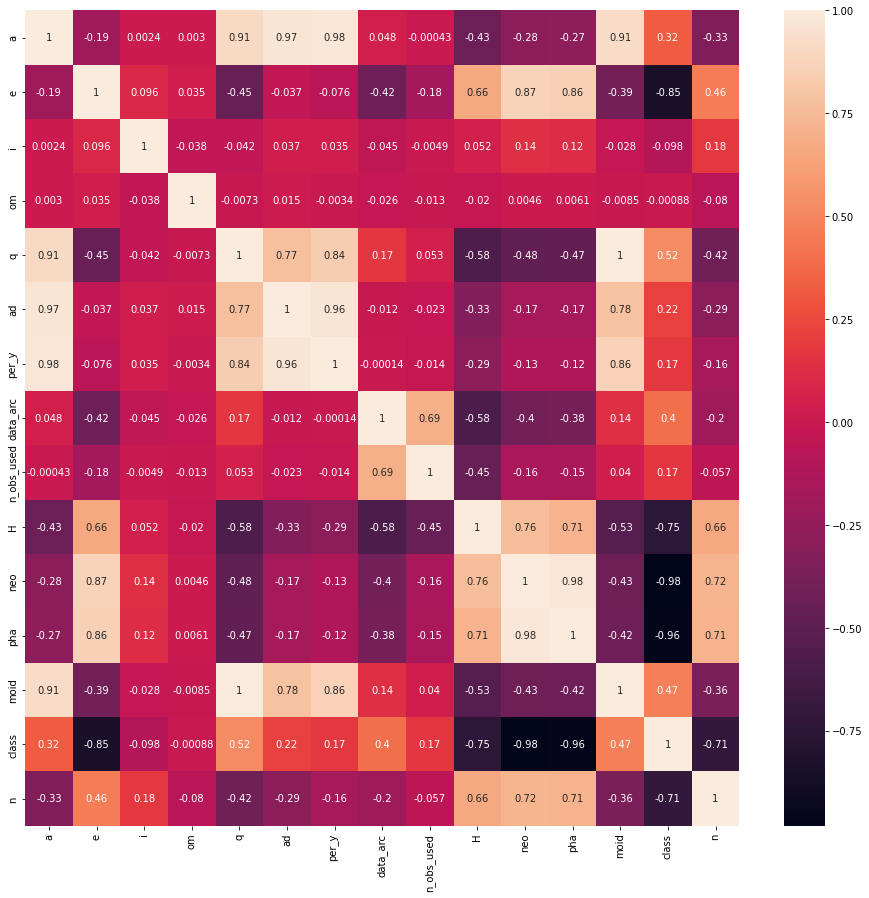

In [ ]:
plt.subplots(figsize = (16,15))
sns.heatmap(df_classification.corr(),annot=True, annot_kws={'size':10})

From the heatmap above, multiple features can be visually identified to have a strong correlation with the Physically Hazardous Asteroid (pha) feature.


**Features with correlation greater than |0.7|:**
 1. *Near Earth Object* (neo) **[0.98]**
 2. *Asteroid orbit class* (class) **[-0.97]**
 3. *Features Eccentricity* (e) **[0.85]**
 4. *Absolute magnitude parameter* (H) **[0.70]**

The features listed above will be used for modeling the prediction of the pha feature.

#### Summary of the Classification Visualization



#### Feature Selection for Classification
Using anova

**Set the target feature *'pha'* to *y_classification* and the other remaining features to *x_classification***

In [ ]:
x_classification = df_classification.drop(columns=['pha'])
y_classification = df_classification['pha']

Now that x_classification and y_classification data sets contain values, an anova can be created using the sklearn SelectKBest feature. The fit method compares x_classification and y_classification, this allows for a final dataset containing resultant values to be created.

**Use the SelectKBest function to create the anova then use the fit method to acquire the anova values. Print the result**

In [ ]:
print("Classification ANOVA")
# ANOVA on features on target to determine which features are significant
anova = SelectKBest(k=10)
# fitting ANOVA model with features and target
anova.fit(x_classification, y_classification)

for i in range(len(x_classification.columns)):
   print(f'{x_classification.columns[i]}: {anova.scores_[i]}')

Classification ANOVA  (16026, 14)
(16026,)
a: 1130.8969318387587
e: 41169.363006508
i: 2357.4387323720584
om: 210.38316652618553
q: 4214.112131954215
ad: 175.3752143479311
per_y: 50.832836391241784
data_arc: 2.123928558173535
n_obs_used: 176.2178037531948
H: 15362.82844324805
neo: 369635.9764705881
moid: 3153.975043512864
class: 221321.71981636182
n: 11640.78285764732


#### Summary of Classification Feature Selection
The higher values are desired for feature selection from the above ANOVA. 


Based on the ANOVA and heatmap we can see that there are multiple features that have high importance when classifying pha. 


1.   neo
2.   class
3.   e
4.   q
5.   n
6.   moid
7.   i
8.   data_arc
9.   a
10.  condition_code

#### Summary of Classification Exploratory Data Analysis
Summary goes here

#### Exploratory Data Analysis Results:

Important features have been selected for using both the visualization and anova methods. Now that these features have been identified, machine learning approaches can be used to model the data.

## Machine Learning Approaches

We tried multiple models for our regression prediction. When it came to parameter tuning, some took an excessive amount of resources and we chose to look elsewhere. If a model performed badly after gridsearch and 10-fold cross validation, we looked into more data and other methods of improving but inevitably found other models that performed well with less tuning and less computational cost. 

**All attempted models**

| Algorithm | Supervised? | Regression or Classification? | Reasoning |
| -------------- | :--------------: | :-------------: | ---------------- |
| Random Forest | Supervised | Regression | High performing model |
| K-Nearest Neighbor | Unsupervised | Regression |   |
| Stochastic Gradient Descent | Supervised | Regression | Good for large amounts of data |
| Gradient Boosting Regressor | Supervised | Regression |   |
| Lasso | Supervised | Regression | Feature selection |
| Support Vector Machine | Supervised | Regression | Can model both linear and non-linear relationships between variables |
| Logistic Regression | Supervised | Classification | Base model for predicting probability of target |
| Support Vector Machine | Supervised | Classification | Works well for low-dimensional data |
| Decision Tree | Supervised | Classification | Easy to compute and explain implementation |



### Justify ML algorithms in terms of the problem itself and the methods you want to use. 
* How did you employ them? 
* What features worked well and what didn't?
* Provide documentation for integration  

### Tools and Infrastructure Tried and Not Used

Describe any tools and infrastruicture that you tried and ended up not using.
What was the problem? 
Describe infrastructure used. 

## **Regression Models for predicting diameter**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(bestX , y_regression, test_size = 0.2, random_state=1)

#### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
print("Base KNN score:", knn.score(x_test,y_test))

Base KNN score: 0.6613847267130195


In [ ]:
"""
param_grid = {'n_neighbors' : [3],
                'weights' : ['distance'],
                'metric' : ['chebyshev','euclidean', ]
                 }

gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

"\nparam_grid = {'n_neighbors' : [3],\n                'weights' : ['distance'],\n                'metric' : ['chebyshev','euclidean', ]\n                 }\n\ngs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='r2', cv=10)\ngs = gs.fit(x_train, y_train)\nprint(gs.best_params_)\nprint(gs.best_score_)\n"

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_neighbors: 3
*   weights: 'distance'
*   metric: 'euclidean'

In [ ]:
bestKNN = KNeighborsRegressor(n_neighbors=3, weights='distance', metric='euclidean')
bestKNN.fit(x_train, y_train)
pred_knn_opt = bestKNN.predict(x_test)

print('Optimal KNN: ', bestKNN.score(x_test,y_test))

Optimal KNN:  0.6367102384591373


In [ ]:
cross_val_KNN = cross_val_score(bestKNN, x_train, y_train, cv=10, n_jobs=16)
print("Optimal KNN CV mean score: ", cross_val_KNN.mean())

Optimal KNN CV mean score:  0.6346900496828048


Text(0.5, 1.0, 'Actual vs Predicted Asteroid Diameter using KNN')

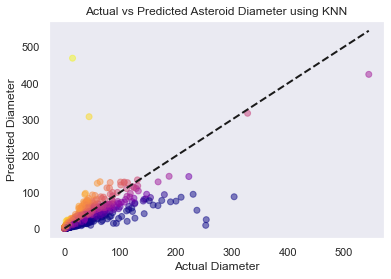

In [ ]:
import matplotlib.pyplot as plt
color = 1 - (y_test / pred_knn_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_knn_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using KNN")

#### Epsilon-Support Vector Regression (SVR)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss

sc = ss()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVR

svr=SVR()

svr.fit(x_train_std, y_train)
pred_svr = svr.predict(x_test_std)
print("Base SVR score: ", svr.score(x_test_std, y_test))

Base SVR score:  0.6559580484997284


In [ ]:
"""
param_grid = [{'C' : [.001, .01, .1, 1, 10],
                'epsilon' : [.001, .01, .1, 1, 10]}]
gs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2', cv=10, return_train_score=True, verbose=True, n_jobs=16)
svr.fit(x_train, ytrain)
gs = gs.fit(x_train, ytrain)
print(gs.best_params_)
print(gs.best_score_)
"""

"\nparam_grid = [{'C' : [.001, .01, .1, 1, 10],\n                'epsilon' : [.001, .01, .1, 1, 10]}]\ngs = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='r2', cv=10, return_train_score=True, verbose=True, n_jobs=16)\nsvr.fit(x_train, ytrain)\ngs = gs.fit(x_train, ytrain)\nprint(gs.best_params_)\nprint(gs.best_score_)\n"

Parameter tuning for SVR will be accomplished with gridsearchCV on parameters C and epsilon ranging from 0.001 to 100 by multiples of 10.

SVR was selected after attempting Stochastic Gradient Descent. After over 72 hrs of parameter tuning, approximately .40 was the highest R2 score achieved. SGD Regression on this dataset required the max_iter to be changed from the default of 1,000 to 1,000,000 to ensure convergence occured. Parameters epsilon and eta0 made almost no impact on the SGD Regression score, but a slight difference in the alpha caused the score to jump from approximately .40 into an unrealistically large integer.

Grid search returned the best performing parameters:

*   C: 10
*   epsilon: 1

In [ ]:
svr=SVR(C=10, epsilon=1)

svr.fit(x_train_std, y_train)
pred_svr_opt = svr.predict(x_test_std)

print("Optimal SVR score: ", svr.score(x_test_std,y_test))

Optimal SVR score:  0.7644326792110565


In [ ]:
cross_val_svr = cross_val_score(svr, x_train_std, y_train, cv=10, n_jobs=16)
print("Optimal SVR CV mean score: ", cross_val_svr.mean())

Optimal SVR CV mean score:  0.7611819114094261


Text(0.5, 1.0, 'Actual vs Predicted Asteroid Diameter using SVR')

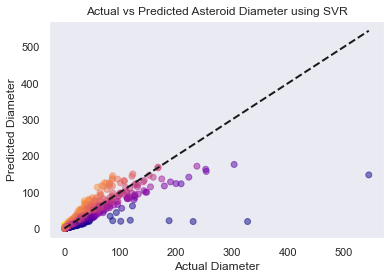

In [ ]:
color = 1 - (y_test / pred_svr_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_svr_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using SVR")

#### Gradient Boosting Regressor

A fitted GBR model using it's default paramters. n_estimators = 100

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
print("Base GBR score: ",gbr.score(x_test, y_test))

Base GBR score:  0.8860433879474203


In [ ]:
"""
param_grid = {'n_estimators' : [105],
             }
gbr = GradientBoostingRegressor()
gs = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=10)
gs = gs.fit(x_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
"""

"\nparam_grid = {'n_estimators' : [105],\n             }\ngbr = GradientBoostingRegressor()\ngs = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='r2', cv=10)\ngs = gs.fit(x_train, y_train)\nprint(gs.best_params_)\nprint(gs.best_score_)\n"

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 105

In [ ]:
gbr_opt = GradientBoostingRegressor(n_estimators=105, random_state=0)
gbr_opt.fit(x_train, y_train)
pred_gbr_opt = gbr_opt.predict(x_test)
print("Optimal GBR score: ",gbr_opt.score(x_test, y_test))

Optimal GBR score:  0.8855842001165629


In [ ]:
cross_val_GBR = cross_val_score(gbr_opt, x_train, y_train, cv=10, n_jobs=16)
print("Optimal GBR CV mean score: ", cross_val_GBR.mean())

Optimal GBR CV mean score:  0.8888411931245235


Text(0.5, 1.0, 'Actual vs Predicted Asteroid Diameter using GBR')

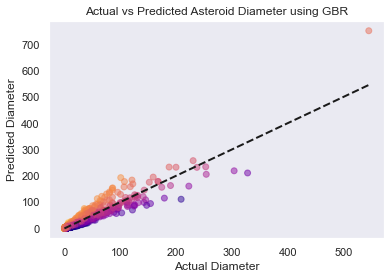

In [ ]:
color = 1 - (y_test / pred_gbr_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_gbr_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using GBR")

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_base = RandomForestRegressor()

rf_base.fit(x_train, y_train)
pred_rf_base = rf_base.predict(x_test)
print("Base RF score: ",rf_base.score(x_test,y_test))

Base RF score:  0.896929202273233


In [ ]:
"""
param_grid = [{'n_estimators' : [100, 150, 200, 250, 300],
               'max_depth' : [None, 10, 20, 30, 40],
               'min_samples_split' : [2, 3, 4]}]

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=10, return_train_score=True)
gs.fit(xtrain,ytrain)
print("\nBest parameters: ",gs.best_params_)
print(gs.best_score_)
"""

'\nparam_grid = [{\'n_estimators\' : [100, 150, 200, 250, 300],\n               \'max_depth\' : [None, 10, 20, 30, 40],\n               \'min_samples_split\' : [2, 3, 4]}]\n\ngs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=\'r2\', cv=10, return_train_score=True)\ngs.fit(xtrain,ytrain)\nprint("\nBest parameters: ",gs.best_params_)\nprint(gs.best_score_)\n'

After running the grid search with the parameter grid above, the following parameters were selected as the best performing

*   n_estimators: 100
*   max_depth 20
*   min_samples_split: 3


In [ ]:
rf_opt = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=3)

rf_opt.fit(x_train, y_train)
pred_rf_opt = rf_opt.predict(x_test)

print("Optimal RF score: ", rf_opt.score(x_test,y_test))

Optimal RF score:  0.8880759108084255


In [ ]:
cross_val_rf = cross_val_score(rf_opt, x_train, y_train, cv=10, n_jobs=16)
print("Optimal RF CV mean score: ", cross_val_rf.mean())

Optimal RF CV mean score:  0.8784215504509483


Text(0.5, 1.0, 'Actual vs Predicted Asteroid Diameter using RF')

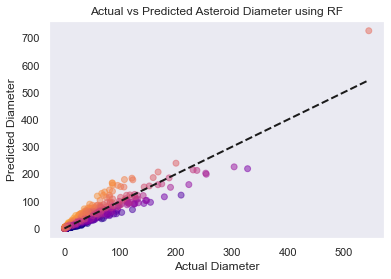

In [ ]:
color = 1 - (y_test / pred_rf_opt)
fig, ax = plt.subplots()
plt.scatter(y_test, pred_rf_opt, c=color, cmap='plasma', vmin=-1, vmax=1, alpha=0.5)
# ax.scatter(y_test, pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel("Actual Diameter")
ax.set_ylabel("Predicted Diameter")
plt.title("Actual vs Predicted Asteroid Diameter using RF")

### Results from Regression

| Sucess Measures: |  CV Score | F1 | Precision | Recall | R^2 |
| ---------- | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| Regressing Diameter | x | - | - | - | x |

### **Classification models for predicting if an asteroid is hazardous:**

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_classifici, y_c, stratify=y_c, test_size=.3, random_state=1)

pca = PCA(n_components=2)
xtrain = pca.fit_transform(xtrain,ytrain)
xtest = pca.transform(xtest)

#### Logistic Regression

Base Logit:  0.6792845257903494


C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

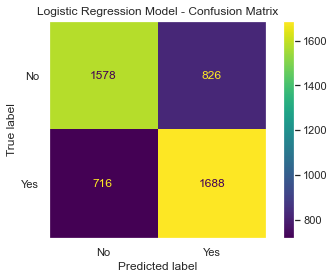

              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67      2294
         1.0       0.70      0.67      0.69      2514

    accuracy                           0.68      4808
   macro avg       0.68      0.68      0.68      4808
weighted avg       0.68      0.68      0.68      4808



In [ ]:
lreg = lr()
lreg.fit(xtrain, ytrain)
pred_lreg = lreg.predict(xtest)

print("Base Logit: ", lreg.score(xtest,ytest))

cm = confusion_matrix(ytest, pred_lreg)
plt.figure()
plot_confusion_matrix(lreg, xtest, ytest)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_lreg, ytest))

In [ ]:
lreg_scores = cross_val_score(lreg, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(lreg_scores))

Average 10-fold score: 0.671


#### Support Vector Classification

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

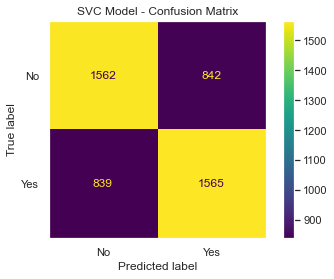

              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65      2401
         1.0       0.65      0.65      0.65      2407

    accuracy                           0.65      4808
   macro avg       0.65      0.65      0.65      4808
weighted avg       0.65      0.65      0.65      4808



In [ ]:
svc = SVC()
svc.fit(xtrain,ytrain)
pred_svc = svc.predict(xtest)

cm = confusion_matrix(ytest, pred_svc)
plt.figure()
plot_confusion_matrix(svc, xtest, ytest)
plt.title("SVC Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_svc, ytest))

In [ ]:
svc_scores = cross_val_score(svc, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(svc_scores))

Average 10-fold score: 0.645


C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

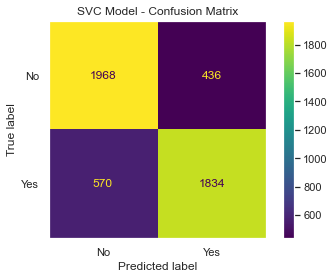

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      2538
         1.0       0.76      0.81      0.78      2270

    accuracy                           0.79      4808
   macro avg       0.79      0.79      0.79      4808
weighted avg       0.79      0.79      0.79      4808



In [ ]:
svc_opt = SVC(C=150)
svc_opt.fit(xtrain,ytrain)
pred_svc_opt = svc_opt.predict(xtest)

cm = confusion_matrix(ytest, pred_svc_opt)
plt.figure()
plot_confusion_matrix(svc_opt, xtest, ytest)
plt.title("SVC Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_svc_opt, ytest))

In [ ]:
svc_scores = cross_val_score(svc_opt, xtest, ytest, cv=5)
print('Average 10-fold score: %.3f' % np.mean(svc_scores))

Average 10-fold score: 0.739


#### Decision Tree Classifier

C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

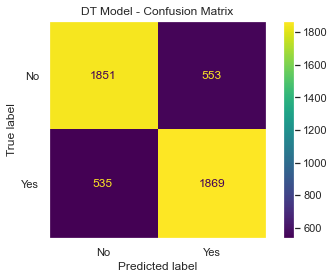

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      2386
         1.0       0.78      0.77      0.77      2422

    accuracy                           0.77      4808
   macro avg       0.77      0.77      0.77      4808
weighted avg       0.77      0.77      0.77      4808



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred_dt = dt.predict(xtest)

cm = confusion_matrix(ytest, pred_dt)
plt.figure()
plot_confusion_matrix(dt, xtest, ytest)
plt.title("DT Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_dt, ytest))

In [ ]:
dt_scores = cross_val_score(dt, xtest, ytest, cv=10)
print('Average 10-fold score: %.3f' % np.mean(dt_scores))

Average 10-fold score: 0.769


C:\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

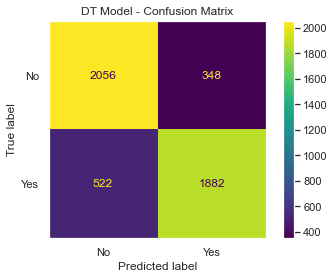

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      2578
         1.0       0.78      0.84      0.81      2230

    accuracy                           0.82      4808
   macro avg       0.82      0.82      0.82      4808
weighted avg       0.82      0.82      0.82      4808



In [ ]:
dt_opt = DecisionTreeClassifier(min_samples_leaf=25, max_depth=7)
dt_opt.fit(xtrain,ytrain)
pred_dt_opt = dt_opt.predict(xtest)

cm = confusion_matrix(ytest, pred_dt_opt)
plt.figure()
plot_confusion_matrix(dt_opt, xtest, ytest)
plt.title("DT Model - Confusion Matrix")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.show()

print(classification_report(pred_dt_opt, ytest))

In [ ]:
dt_scores_opt = cross_val_score(dt_opt, xtest, ytest, cv=10)
print('Average 10-fold score: %.3f' % np.mean(dt_scores_opt))

Average 10-fold score: 0.826


### Results from Classification

| Sucess Measures: |  CV Score | F1 | Precision | Recall | R^2 |
| ---------- | :-----------: | :-----------: | :-----------: | :-----------: | :-----------: |
| Logistic Regression | x | x | x | x | - | 
| Support Vector Machine | x | x | x | x | - | 
| Decision Tree | x | x | x | x | - | 

## Experiments

Give a detailed summary of the results of your work.

Different Ideas for dealing with the imbalance include: 

*   Upsampling the minority class to match the majority class
    * SMOTE
    * Resample
    * VAE
*   Downsample the majority class to match the minority
    * Resample
    * VAE

After attempting to use the raw data to upsample and downsample we concluded that we needed more usable data instead of resampling our available data.

 * Setup - Here is where you specify the exact performance measures you used.  
   * Describe the data used in experiment for presenting dataset: Datasheets for Dataset template 
   * Describe your accuracy or quality measure, and your performance (runtime or throughput) measure. 
   
 * Please use visualizations whenever possible. Include links to interactive visualizations if you built them. 
 
 * You can also submit a separated notebook as an appendix to your report if that makes the visualization/interaction task easier. 
   * It would be reasonable to submit your report as a notebook, but please make sure it runs on one of the two standard environments, and that you include any required files. 

## Conclusion
In this section give a high-level summary of your results. If the reader only reads one section of the report, this one should be it, and it should be self-contained.  You can refer back to the Experiments Section for elaborations. This section should be less than a page. In particular emphasize any results that were surprising.

## References
https://scikit-learn.org/stable/ - Scikit-learn website used to read about and select models. Shows important parameters, methods and attributes each model has. Also includes majority of the tools used in this project.

https://www.tensorflow.org/api_docs/python/tf - Tensorflow API used to create VAE.

https://seaborn.pydata.org/

https://matplotlib.org/stable/index.html

https://numpy.org/

https://pandas.pydata.org/docs/reference/index.html

## Appendix

Explain the contributions of each member to the project. Include all supporting materials, e.g., additional figures/tables, Python code technical derivations.